In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split 

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
df = pd.read_csv('SpamEmail.csv')
print('dataset: ')

print(df.head(), '\n')
print('Null values in the dataset: ')

print(df.isnull(), '\n')
print('Sum of Null values in each column: ')

print(df.isnull().sum(), '\n')

df["Category"] = [1 if each == "spam" else 0 for each in df["Category"]]

print('dataset: ')
print(df.head(), '\n')

dataset: 
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 

Null values in the dataset: 
      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns] 

Sum of Null values in each column: 
Category    0
Message     0
dtype: int64 

dataset: 
   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u o

In [59]:
X = df.iloc[:,1].values
X = X.reshape(-1,1)
print('Type of X:', type(X))
print('Shape of X:', X.shape)


Type of X: <class 'numpy.ndarray'>
Shape of X: (5572, 1)


In [60]:
Y = df.iloc[:, 0].values
y = Y.reshape(-1, 1)
print('Type of Y; ', type(Y))
print('Shape of Y: ', y.shape)

Type of Y;  <class 'numpy.ndarray'>
Shape of Y:  (5572, 1)


In [61]:
X = X.tolist()
y = y.tolist()
print('Length of X: ', len(X), '\n')

Length of X:  5572 



In [62]:
X_train = X[1000:]
y_train = y[1000:]
print('Length of training samples ', len(X_train), '\n')

X_test = X[0: 1000]
y_test = y[0:1000]
print('Length of testing samples', len(X_test), '\n')

Length of training samples  4572 

Length of testing samples 1000 



In [63]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [64]:
print("length of training sample: ", len(X_train))
print("length of testing sample: ", len(X_test))

length of training sample:  4572
length of testing sample:  1000


In [65]:
tokenizer = Tokenizer(num_words=30000, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [66]:
Training_Sequences = tokenizer.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_Sequences, maxlen=32, padding='post', truncating='post')

Testing_Sequences = tokenizer.texts_to_sequences(X_test)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=32, padding='post', truncating='post')

In [67]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(30000, 16, input_length=32))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 16)            480000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 32, 128)          41472     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [69]:
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


In [70]:
EPOCHS = 15
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, y_train, validation_data=(Testing_Sequences_padded, y_test), epochs=15)

Epoch 1/15
143/143 [==============================] - 10s 40ms/step - loss: 0.4134 - accuracy: 0.8664 - val_loss: 0.4658 - val_accuracy: 0.8480
Epoch 2/15
143/143 [==============================] - 5s 33ms/step - loss: 0.3887 - accuracy: 0.8699 - val_loss: 0.4245 - val_accuracy: 0.8480
Epoch 3/15
143/143 [==============================] - 5s 34ms/step - loss: 0.1937 - accuracy: 0.9364 - val_loss: 2.8101 - val_accuracy: 0.2300
Epoch 4/15
143/143 [==============================] - 5s 35ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.8820
Epoch 5/15
143/143 [==============================] - 5s 34ms/step - loss: 3.6248e-04 - accuracy: 1.0000 - val_loss: 0.5316 - val_accuracy: 0.8820
Epoch 6/15
143/143 [==============================] - 5s 33ms/step - loss: 1.9697e-04 - accuracy: 1.0000 - val_loss: 0.5696 - val_accuracy: 0.8820
Epoch 7/15
143/143 [==============================] - 5s 35ms/step - loss: 1.2849e-04 - accuracy: 1.0000 - val_loss: 0.5990 - val_acc

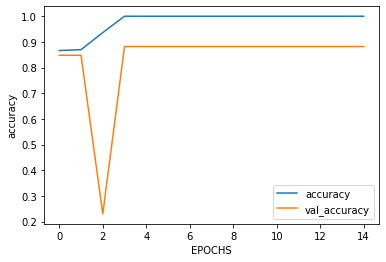

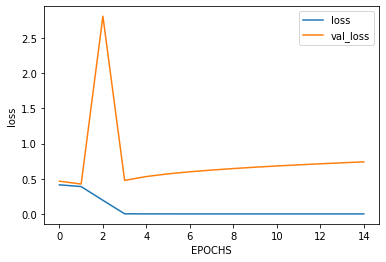

In [71]:
def Plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string ])
    plt.savefig(string + '.png')
    plt.show()
    
    
Plot(history, "accuracy")
Plot(history, "loss")


In [74]:
text = 'Upto 50% off on electronics, shop now'
print(text)
Test = tokenizer.texts_to_sequences([text])[0]
Test_padded = pad_sequences([Test], maxlen=32, padding='post', truncating='post')
Test_padded = np.asarray(Test_padded)
print('Done')
print(Test_padded.shape)
ypred = model.predict(Test_padded)
if ypred[0][0]>0.5:
    print('spam')
else: print('Not spam')
print('output class: ', ypred)

Upto 50% off on electronics, shop now
Done
(1, 32)
1/1 [==============================] - 0s 16ms/step
spam
output class:  [[0.9999526]]


In [84]:
y_pred = model.predict(Testing_Sequences_padded)
classes_x=np.argmax(y_pred,axis=1)
print(y_pred.shape)

32/32 [==============================] - 0s 10ms/step
(1000, 1)


In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model is",(accuracy_score(y_test, classes_x)*100), "%")

Accuracy of the model is 84.8 %
